In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import scipy.stats as stats
from helpers_similarity import *


In [10]:
# testing stats.kendalltau function
tau, _ = stats.kendalltau([3,1,0,2,4], [3,1,0,4,2])
print(tau)
tau, _ = stats.kendalltau([1,2,3,4,5], [1,2,3,5,4])
print(tau)
a = [0.5, 0.7, 0.2, 0.8, 0]
b = [0.6, 0.9, 0, 1, 0.4]
tau, _ = stats.kendalltau(a, b)
print(tau)

0.39999999999999997
0.7999999999999999
0.7999999999999999


In [31]:
mu = 0.0 
sigma_u = 1.0
sigma_v = 1.0
sigma = [0, 0.2, 0.4, 0.6, 0.8, 1] 

D = 2 #dimension
N = 10 #nbr of users
M = 10 #nbr of movies
alpha_vals = [1, 3, 10, 30, 100] #[1,5,10,50,100]
M_vals = [M*alpha for alpha in alpha_vals]
k_best = 10 # 
nb_iter = 100 #100

compute averaged similarities for different values of M and sigma

In [38]:
np.random.seed(0)
data= []

for s in sigma:
    for alpha in alpha_vals:
        for k in range(nb_iter):            
            U, V, R = generate_U_V_R(mu, sigma_u, sigma_v, s, alpha, D, N, M)
            similarities= sim_avg_users(U.T, R)
            row= [M*alpha, s, similarities]
            data.append(row)

In [39]:
df = pd.DataFrame(data, columns=['M','sigma','sim_U_R'])
df_res= df.groupby(by=['M','sigma']).mean()
df_res['sim_U_R'].unstack()

sigma,0.0,0.2,0.4,0.6,0.8,1.0
M,,,,,,
10,0.930533,0.876622,0.814533,0.745422,0.674756,0.633333
30,0.965111,0.911644,0.870800,0.833822,0.786889,0.733867
100,0.978400,0.945778,0.905378,0.873822,0.848489,0.801778
300,0.989733,0.955289,0.915378,0.884978,0.863867,0.838756
1000,0.993600,0.961822,0.926844,0.907067,0.880267,0.859333


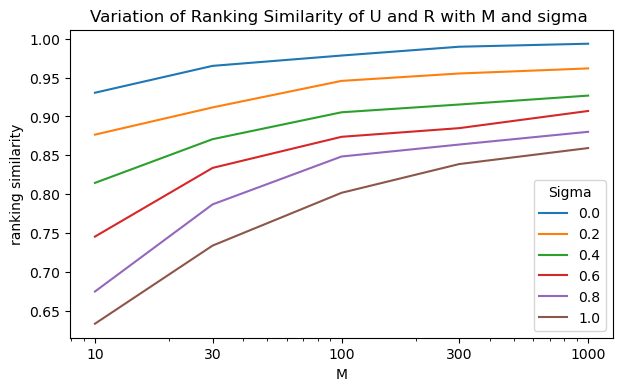

In [40]:
fig, ax = plt.subplots(figsize=(7,4))
df_res['sim_U_R'].unstack().plot(ax=ax)
plt.legend(title= 'Sigma', loc='lower right')
plt.title('Variation of Ranking Similarity of U and R with M and sigma ')
plt.xscale('log')
plt.xticks(M_vals, M_vals)
plt.xlabel('M')
plt.ylabel('ranking similarity')

plt.show()

# SVD

compute averaged similarities for matrices U_svd and U for different values of M and sigma

In [41]:
np.random.seed(0)
data= []
for s in sigma:
    for alpha in alpha_vals:
        for k in range(nb_iter):
            U, V, R = generate_U_V_R(mu, sigma_u, sigma_v, s, alpha, D, N, M)
            # print("U\n", U)
            # print("V\n", V)
            # print("R\n", R)
            U_svd, D_svd, VT_svd = np.linalg.svd(R, full_matrices=False)
            # print("U_svd\n", U_svd)
            # print("D_svd\n", D_svd)
            # print("V_svd\n", VT_svd.T)
            # print("U_svd . D_svd\n", np.dot(U_svd, np.diag(D_svd)))
            # print("U_svd . D_svd\n", U_svd*D_svd)
            similarities= sim_avg_users(U.T, U_svd[:,:D])
            row= [M*alpha, s, similarities]
            data.append(row)
# print values of D : diagonal values 

In [42]:
df2 = pd.DataFrame(data, columns=['M','sigma','sim_U_R'])
df2_res= df2.groupby(by=['M','sigma']).mean()
df2_res['sim_U_R'].unstack()

sigma,0.0,0.2,0.4,0.6,0.8,1.0
M,,,,,,
10,0.925644,0.879289,0.827467,0.769378,0.666889,0.639733
30,0.921111,0.905200,0.871689,0.856578,0.811156,0.776533
100,0.926800,0.919556,0.898311,0.886622,0.875600,0.849867
300,0.924311,0.922311,0.914000,0.906622,0.894578,0.885289
1000,0.922400,0.923911,0.916356,0.911733,0.914844,0.911378


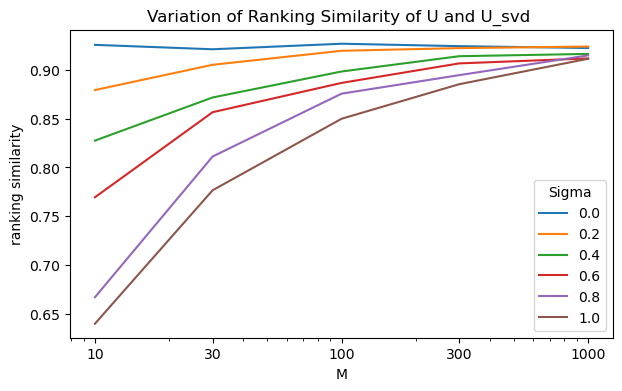

In [43]:
fig, ax = plt.subplots(figsize=(7,4))
df2_res['sim_U_R'].unstack().plot(ax=ax)
plt.legend(title= 'Sigma', loc='lower right')
plt.title('Variation of Ranking Similarity of U and U_svd ')
plt.xscale('log')
plt.xticks(M_vals, M_vals)
plt.xlabel('M')
plt.ylabel('ranking similarity')

plt.show()

# Truncated SVD

compute averaged similarities for matrices R and transformed matrix trunc_svd
for different values of M ,sigma and components

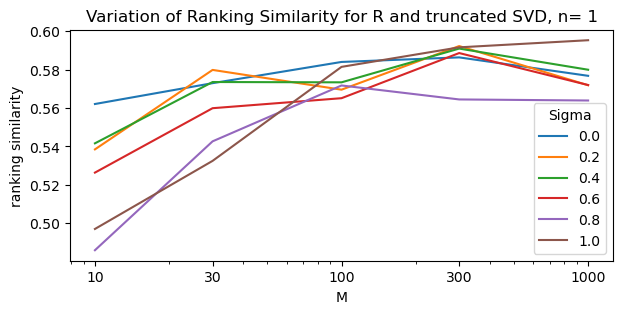

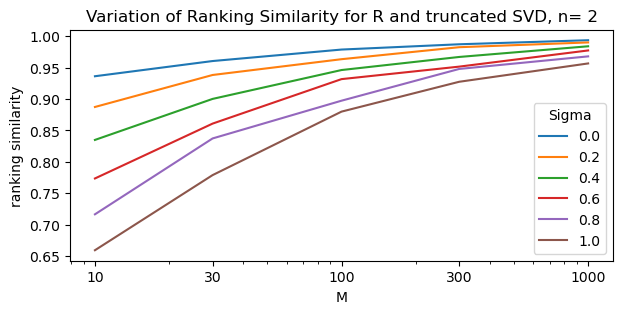

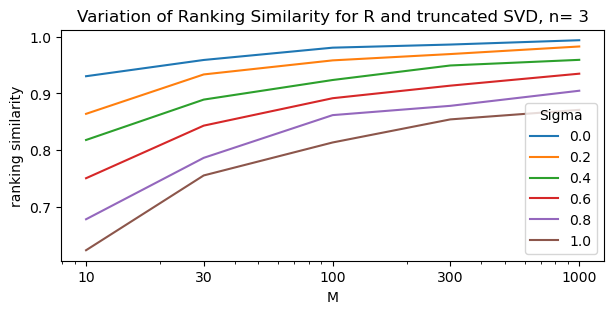

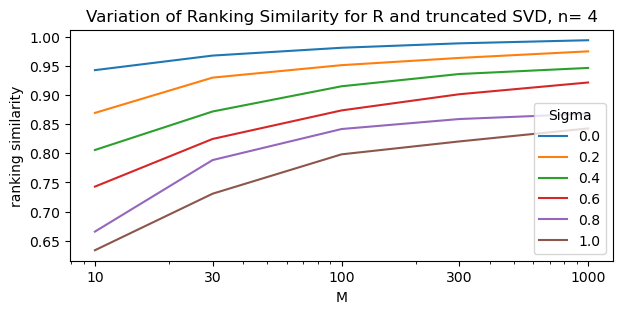

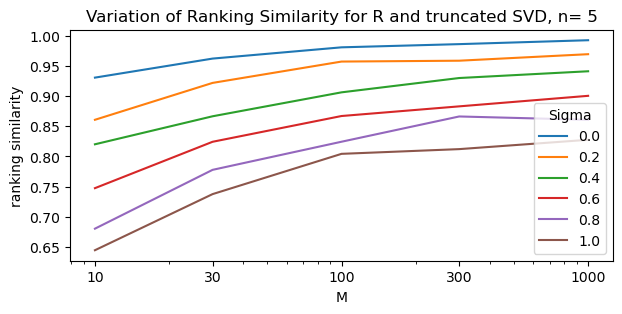

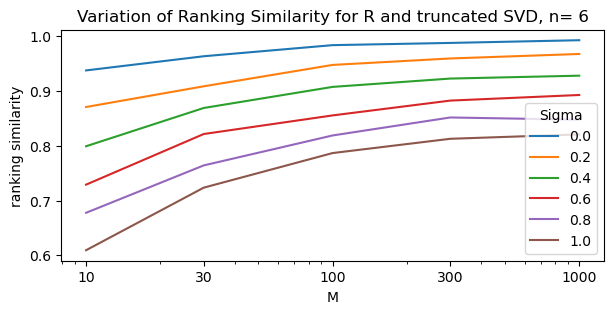

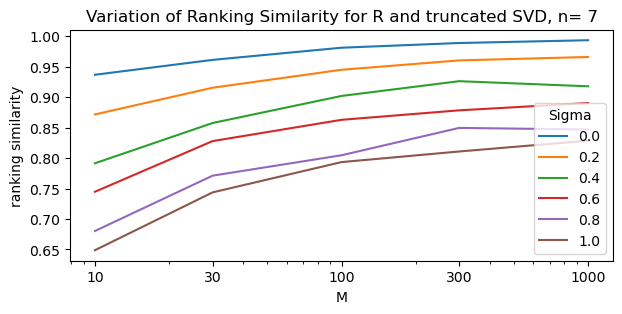

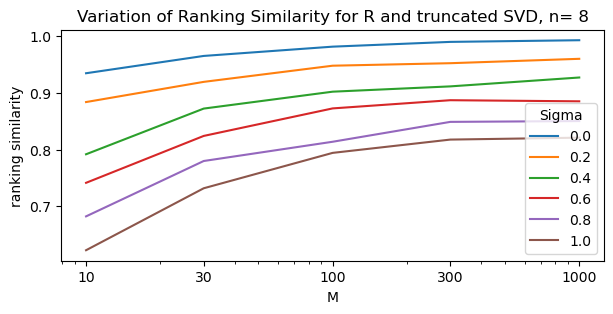

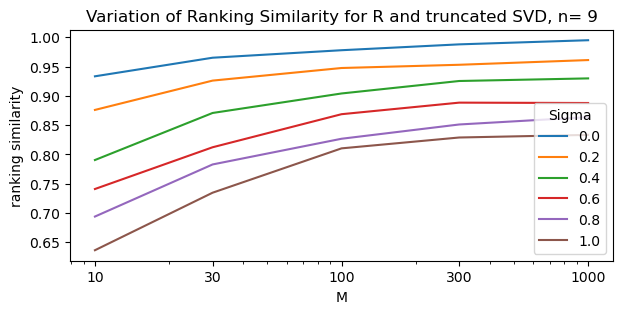

In [44]:
for nb_components in range(1,M,1):
    data= []
    for s in sigma:
        for alpha in alpha_vals:
            for k in range(nb_iter):
                U, V, R = generate_U_V_R(mu, sigma_u, sigma_v, s, alpha, D, N, M)
                trun_svd = TruncatedSVD(n_components = nb_components).fit_transform(R)
                similarities= sim_avg_users(U.T, trun_svd)
                row= [M*alpha, s, similarities]
                data.append(row)
    
    
    df= pd.DataFrame(data, columns=['M','sigma','sim_U_R'])
    df_res= df.groupby(by=['M','sigma']).mean()
    df_res['sim_U_R'].unstack()
    
    fig, ax = plt.subplots(figsize=(7,3))
    df_res['sim_U_R'].unstack().plot(ax=ax)
    plt.legend(title= 'Sigma', loc='lower right')
    plt.title('Variation of Ranking Similarity for R and truncated SVD, n= {}'.format(nb_components) )
    plt.xscale('log')
    plt.xticks(M_vals, M_vals)
    plt.xlabel('M')
    plt.ylabel('ranking similarity')
    plt.show()